In [3]:
import numpy as np
from matplotlib import pyplot as plt
import random as rand
def base_generator(N):
    a = 5**13
    m = 2**31 + 1
    x0 = rand.randint(111111111,999999999)

    x = [x0]
    r = [x0/m]
    for i in range(1,N):
        x.append((a*x[i-1]) % m)
        r.append(x[i]/m)

    return r


def normal_distr_value(mu, sigma, N = 12):
    r = base_generator(N)
    return mu + (sigma*(sum(r) - N/2))/(np.sqrt(N/12))







In [1]:


# def get_dim_count(arr):
#     q = 1
#     if type(arr[0]) is int or type(arr[0]) is float:
#         q = 1
#     elif type(arr[0]) is tuple:
#         q = len(arr[0])
#     return q

# def transform(arr):
#     arr_new = []
#     for i in arr:
#         t = (i,)
#         arr_new.append(t)
#     return arr_new

def norm(x,mu,sigma):
    return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-((x-mu)**2)/(2*sigma**2))

# метод, который определяет парметры распределений заданного набора числей, входящих в смесь распределений
def EM_method(x,k,eps = 1e-10, tryes = 30, Qmax = 100):
    g_delta = 1
    g_w = np.zeros(k)
    g_mu = np.zeros(k)
    g_sigma = np.zeros(k)

    for tr in range(tryes):
        n = len(x)
        g = np.random.rand(k,n)
        w = np.random.rand(k)
        mu = np.random.rand(k)
        sigma = np.random.rand(k)

        delta = 1
        iter = 0
        prev_delta = 2
        prev_sigma = np.zeros(k)
        prev_w = np.zeros(k)
        prev_mu = np.zeros(k)

        while delta >= eps and iter <= Qmax and delta < prev_delta:
            prev_delta = delta
            prev_mu = mu
            prev_w = w
            prev_sigma = sigma
            iter += 1

            #E step
            g0 = g.copy()

            for i in range(k):
                for j in range(n):
                    det = 0
                    for v in range(k):
                        det += w[v]*norm(x[j],mu[v],sigma[v])
                    g[i][j] = w[i]*norm(x[j],mu[i],sigma[i])/det

            delta = np.max(np.absolute(g0-g))

            #M step
            for i in range(k):
                sumG = 0
                sumGX = 0
                sumGXMu = 0

                for j in range(n):
                    sumG += g[i][j]
                    sumGX += g[i][j]*x[j]
                    sumGXMu += g[i][j]*((x[j] - mu[i])**2)

                mu[i] = sumGX / sumG
                sigma[i] = np.sqrt(sumGXMu/ sumG)
                w[i] = (1/n)*sumG
        
            #print('Delta')
            #print(delta)
    
        #print('Itterations')
        #print(iter)
        
        if (prev_delta < delta):
            delta = prev_delta
            mu = prev_mu
            sigma = prev_sigma
            w = prev_w

        if (delta < g_delta):
            print('Found good delta')
            print(delta)
            g_delta = delta
            g_w = w
            g_mu = mu
            g_sigma = sigma
    
        print('Try')
        print(tr+1)
    
    print('Done')
    print(g_delta)
    return g_w, g_mu, g_sigma

#P[i] = w[i] * norm(x,m[i],sigma[i])
#P = sum(P[i])





                





(array([ 108., 1730., 5098., 2774.,  306.,  546., 3551., 4526., 1313.,
          48.]),
 array([-3.74500775, -2.4206236 , -1.09623945,  0.2281447 ,  1.55252884,
         2.87691299,  4.20129714,  5.52568128,  6.85006543,  8.17444958,
         9.49883372]),
 <BarContainer object of 10 artists>)

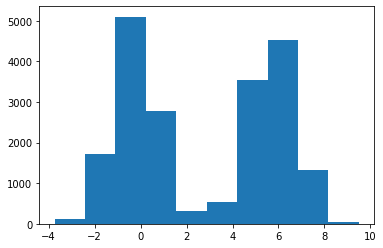

In [4]:

X = []
for i in range (10000):
    X.append(normal_distr_value(0,1))
for i in range (10000):
    X.append(normal_distr_value(6,1))



plt.hist(X)




In [5]:
k = 3

eps = 0.6

Qmax = 100
tryes = 5

w,mu,sigma = EM_method(X,k,eps,tryes,Qmax)

Found good delta
0.4534284056791257
Try
1
Found good delta
0.36444180443141394
Try
2
Found good delta
0.30716369570257673
Try
3
Found good delta
0.19376391669934884
Try
4
Try
5
Done
0.19376391669934884


In [6]:
print(w)
print(mu)
print(sigma)

[0.17870861 0.28444592 0.53684547]
[ 2.71560874 -0.26422042  4.36310379]
[3.22999531 0.77051498 2.7759439 ]


0.1787086127447932
0.28444591732379726
0.5368454699314061


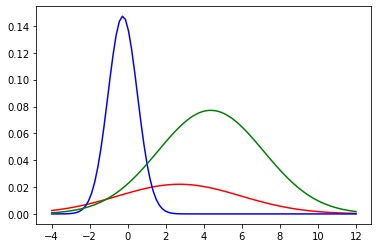

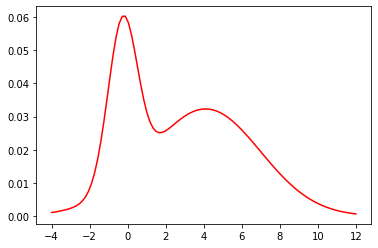

(array([0.00407737, 0.06531338, 0.19246682, 0.10472792, 0.01155254,
        0.02061335, 0.13406231, 0.17087187, 0.04957021, 0.00181216]),
 array([-3.74500775, -2.4206236 , -1.09623945,  0.2281447 ,  1.55252884,
         2.87691299,  4.20129714,  5.52568128,  6.85006543,  8.17444958,
         9.49883372]),
 <BarContainer object of 10 artists>)

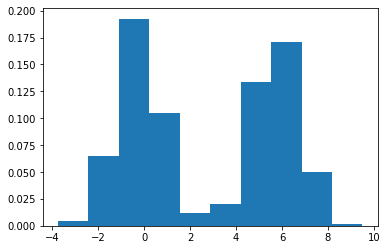

In [8]:
# 100 linearly spaced numbers
x = np.linspace(-4,12,100)

# the function, which is y = x^2 here
y = 0
for i in range(k):
    print(w[i])
    y += w[i] * norm(x,mu[i],sigma[i]) /k

# setting the axes at the centre
fig = plt.figure()



y1 = w[0] * norm(x,mu[0],sigma[0])
y2 = w[1] * norm(x,mu[1],sigma[1])
y3 = w[2] * norm(x,mu[2],sigma[2])

# plot the function
plt.plot(x,y1, 'r')
plt.plot(x,y2, 'b')
plt.plot(x,y3, 'g')

plt.show()

# setting the axes at the centre
fig = plt.figure()

# plot the function
plt.plot(x,y, 'r')



# show the plot
plt.show()

plt.hist(X, density=True)
